In [24]:
from selenium import webdriver
from time import sleep
# Data manipulation
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


driver = webdriver.Chrome(executable_path="C:/Users/ONUR/Desktop/chromedriver.exe")
migros_arama = "nescafe gold ekonomik paket"

driver.get("https://www.migros.com.tr/")
sleep(4)

#bildirim iptali
driver.find_element_by_xpath('//*[@id="close-modal"]/button/span[2]')\
    .click()
sleep(2)

#arama
driver.find_element_by_xpath('//*[@id="product-search-combobox--trigger"]')\
    .send_keys(migros_arama)
driver.find_element_by_xpath('//*[@id="header-wrapper"]/div[2]/fe-product-search-combobox/div/div')\
    .click()
sleep(3)


item_titles = driver.find_elements_by_xpath('//mat-card/div/a')
item_prices = driver.find_elements_by_xpath('/html/body/sm-root/div/main/sm-product/article/sm-list/div[2]/div[4]/div[2]/div[4]/sm-list-page-item[*]/mat-card/div[3]/fe-product-price/div/div[2]/span')

# Initialize empty lists
titles_list = []
prices_list = []
# Loop over the item_titles and item_prices
for title in item_titles:
    titles_list.append(title.text)
for prices in item_prices:
    prices_list.append(prices.text)
    
print(titles_list)
print(prices_list)

C:\Users\ONUR\AppData\Local\Temp/ipykernel_23144/1107734083.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="C:/Users/ONUR/Desktop/chromedriver.exe")
C:\Users\ONUR\AppData\Local\Temp/ipykernel_23144/1107734083.py:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="close-modal"]/button/span[2]')\
C:\Users\ONUR\AppData\Local\Temp/ipykernel_23144/1107734083.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="product-search-combobox--trigger"]')\
C:\Users\ONUR\AppData\Local\Temp/ipykernel_23144/1107734083.py:24: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="header-wrapper"]/div[2]/fe-product-search-combobox/div/div')\
C:\Users\ON

['Nescafe Gold Ekonomik Paket 150 G', 'Nescafe Gold Ekonomik Paket 180 G', 'Nescafe Gold Ekonomik Paket 200 G', 'Nescafe Gold Ekonomik Paket 100 G', 'Nescafe Gold 50 G Ekonomik Paket', 'Nescafe Gold Espresso Ekonomik Paket 80 G', 'Nescafe Gold Crema Ekonomik Paket 80 G', 'Nescafe Gold Alta Rica Ekonomik Paket 70 G', 'Nescafe Gold Cap Colombia Ekonomik Paket 70 G']
['69,95 TL', '69,95 TL', '83,75 TL', '41,95 TL', '32,75 TL', '41,95 TL', '41,95 TL']


In [34]:
dfL = pd.DataFrame(zip(titles_list, prices_list), columns=['Ürün Adı', 'Fiyat'])



In [35]:
dfL['Mağaza'] = 'Migros'


In [40]:
#Migros fiyatlarda virgül kullanıyor ve floata çevirirken virgül kabul etmiyor. bu nedenle fiyatlarda yer alan virgülleri "." çeviriyoruz.


dfL['Fiyat'] = dfL['Fiyat'].str.replace(',', '.')


In [41]:
dfL['Fiyat'] = dfL['Fiyat'].str.replace('TL', '').astype(float)



In [42]:
print(dfL)

                                    Ürün Adı  Fiyat  Mağaza
0          Nescafe Gold Ekonomik Paket 150 G  69.95  Migros
1          Nescafe Gold Ekonomik Paket 180 G  69.95  Migros
2          Nescafe Gold Ekonomik Paket 200 G  83.75  Migros
3          Nescafe Gold Ekonomik Paket 100 G  41.95  Migros
4           Nescafe Gold 50 G Ekonomik Paket  32.75  Migros
5  Nescafe Gold Espresso Ekonomik Paket 80 G  41.95  Migros
6     Nescafe Gold Crema Ekonomik Paket 80 G  41.95  Migros


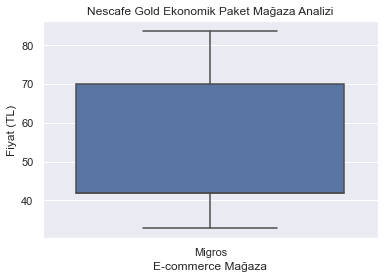

In [44]:
# Plot the chart
sns.set()
_ = sns.boxplot(x='Mağaza', y='Fiyat', data=dfL)
_ = plt.title('Nescafe Gold Ekonomik Paket Mağaza Analizi')
_ = plt.ylabel('Fiyat (TL)')
_ = plt.xlabel('E-commerce Mağaza')
# Show the plot
plt.show()